<h2 align="center">Лабораторна робота №8-9</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "Вбудовані засоби Python для застосування методів й алгоритмів ройового інтелекту".</p>
<p><b>Мета роботи:</b> опанувати вбудовані засоби Python для застосування методів й алгоритмів ройового інтелекту.</p>

## Завдання:
### Ознайомитись з теоретичними відомостями:
1) https://pypi.org/project/pyswarms/
2) https://pyswarms.readthedocs.io/en/latest/
3) https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
4) Прикладами використання PSO, DE, які надані у даній ЛР (прикріплені файли)
### Виконати одне з наступних завдань:
1) (8 бали) Узяти будь-які три функції без функціональних обмежень на них (наприклад, з ЛР №1), які не наведені у файлах з прикладами (які прикріплені нижче)
2) (12 балів) Узяти будь-які дві функції з функціональними обмеженнями на них (наприклад, з ЛР №2 та ЛР №3), які не наведені у файлах з прикладами (які прикріплені нижче)
2) (16 балів) Узяти будь-які дві нелінійні регресійні моделі (з ЛР №6), які не наведені у файлах з прикладами (які прикріплені нижче)
### Захистити результати виконання ЛР 9 (4 бали).

In [107]:
from pyswarms.single.global_best import GlobalBestPSO
from scipy.optimize import differential_evolution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history

In [15]:
def f1(x, b1, b2):
    return b1 * (1 - np.e**(-b2*x))

In [16]:
def f5(x, b1, b2):
    return b1*(1 - 1/(1+(b2 ** 2 * x ** 2)/2))

In [17]:
def f10(x, b1, b2):
    return b1*(1-1/(1+2*b2*x)**(1/2))

In [11]:
data1 = pd.read_csv('var1.csv')

In [12]:
data5 = pd.read_csv('var5.csv')

In [13]:
data10 = pd.read_csv('var10.csv')

In [144]:
def PSO(func, data, bounds, iters):
    
    def cost_function(params):
        b1 = params[:, 0]
        b2 = params[:, 1]
        errors = []
        for i in range(len(params)):
            y_pred = f1(data['x'], b1[i], b2[i])
            mse = np.mean((data['y'] - y_pred) ** 2)
            errors.append(mse)
        return errors

    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    optimizer = GlobalBestPSO(n_particles=80, dimensions=2, options=options, bounds=bounds)
    best_cost, params = optimizer.optimize(cost_function, iters=iters)
    y_fit = f1(data['x'], params[0], params[1])
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].scatter(data['x'], data['y'], label='Data')
    axes[0].plot(data['x'], y_fit, color='g', label='Fit')
    axes[0].set_title('Curve Fit using PSO')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].legend()


    axes[1].plot(optimizer.cost_history, marker='o')
    axes[1].set_title('Best Cost per Iteration')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('MSE')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

2025-05-18 01:59:58,917 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████|1000/1000, best_cost=123
2025-05-18 02:00:09,436 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 123.2205582761267, best pos: [5.79410546e+01 4.13966358e-03]


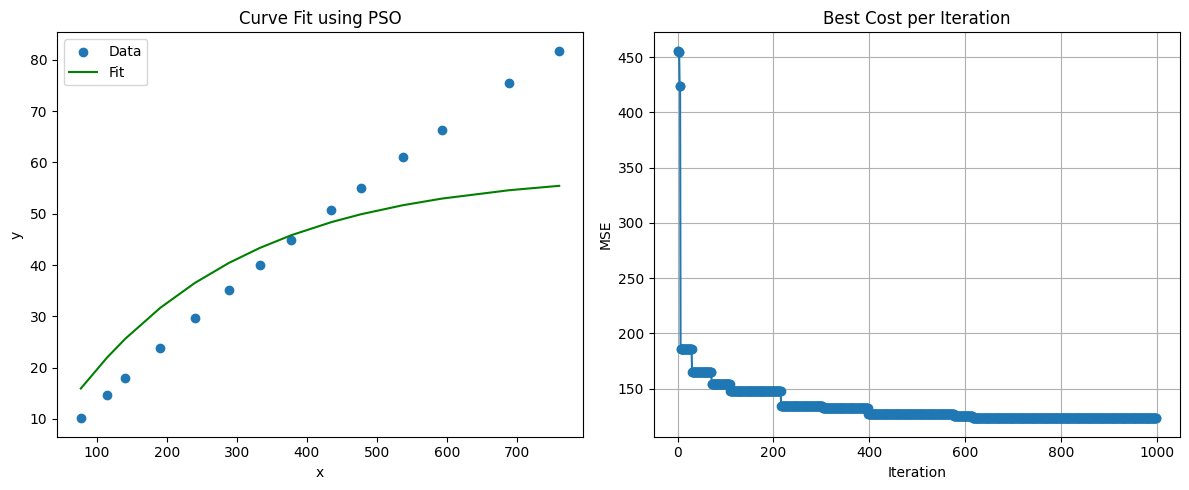

In [145]:
PSO(f1, data1, [[0, 0], [100, 1]], 1000)

2025-05-18 02:00:15,878 - pyswarms.single.global_best - INFO - Optimize for 900 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████|900/900, best_cost=87.1
2025-05-18 02:00:25,609 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 87.11974116184531, best pos: [6.46078911e+01 3.20342043e-03]


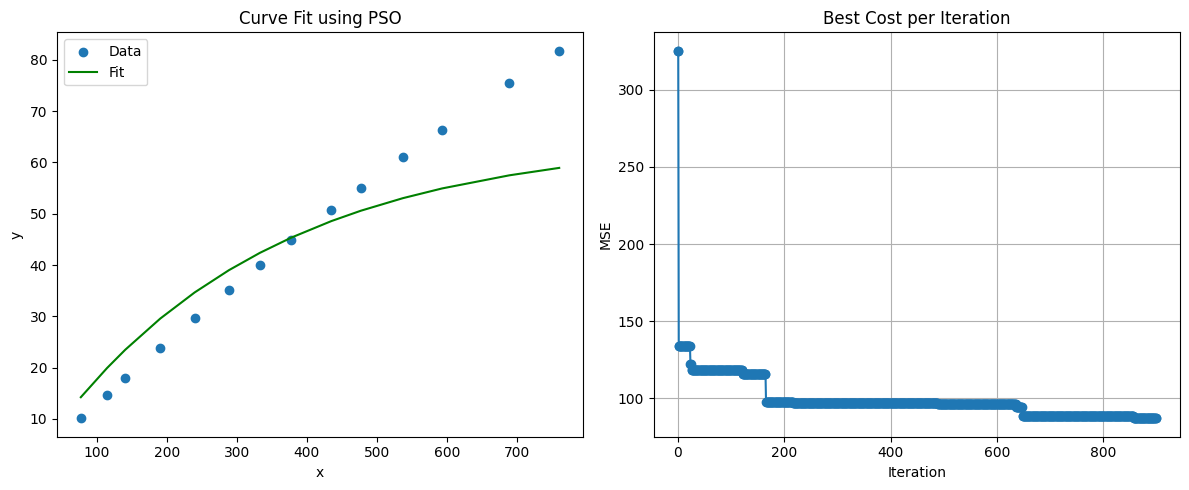

In [146]:
PSO(f5, data5, [[0, 0], [100, 1]], 900)

2025-05-18 02:00:28,668 - pyswarms.single.global_best - INFO - Optimize for 800 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████|800/800, best_cost=4.6
2025-05-18 02:00:37,271 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.595604547948622, best pos: [4.51801356e+02 2.59044714e-04]


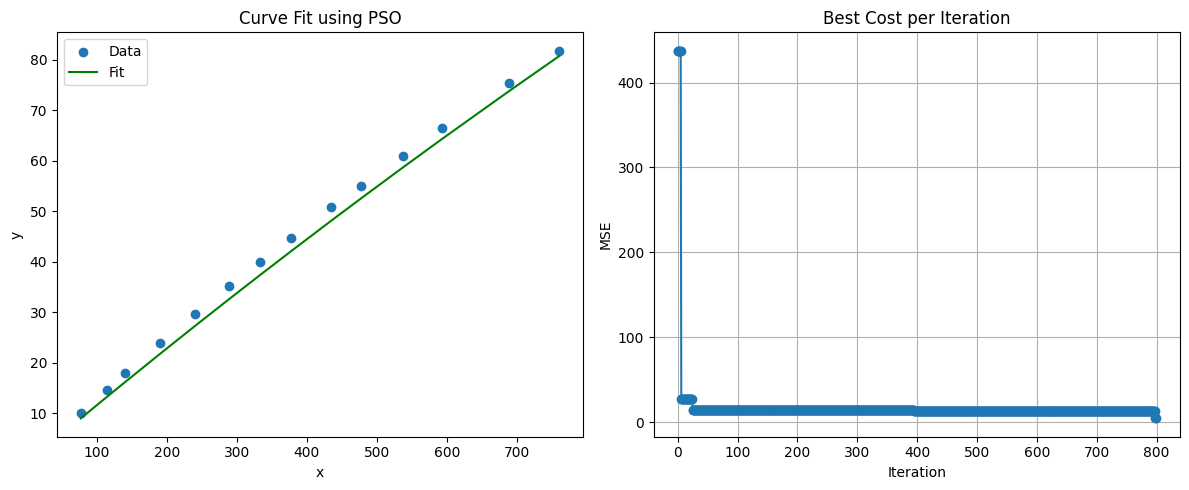

In [147]:
PSO(f10, data10, [[100, 0], [1000, 1]], 800)

In [140]:
def diff_evol(func, data, bounds): 
    fitness_history = []
    
    def cost_function(params):
        b1, b2 = params
        y_pred = func(data['x'], b1, b2)
        mse = np.mean((data['y'] - y_pred) ** 2)
        return mse

    def callback(xk, convergence):
        fitness = cost_function(xk)
        fitness_history.append(fitness)
        
    result = differential_evolution(cost_function, bounds, callback = callback)
    
    print(f"Best b1: {result.x[0]}, Best b2: {result.x[1]}")
    
    y_fit = func(data['x'], result.x[0], result.x[1])
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(data['x'], data['y'], label='Data')
    plt.plot(data['x'], y_fit, color='g', label='Fit')
    plt.title('Curve Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(fitness_history, marker='o')
    plt.title('Best Fitness per Generation')
    plt.xlabel('Generation')
    plt.ylabel('MSE')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Best b1: 99.99573398432861, Best b2: 0.0017012433727812144


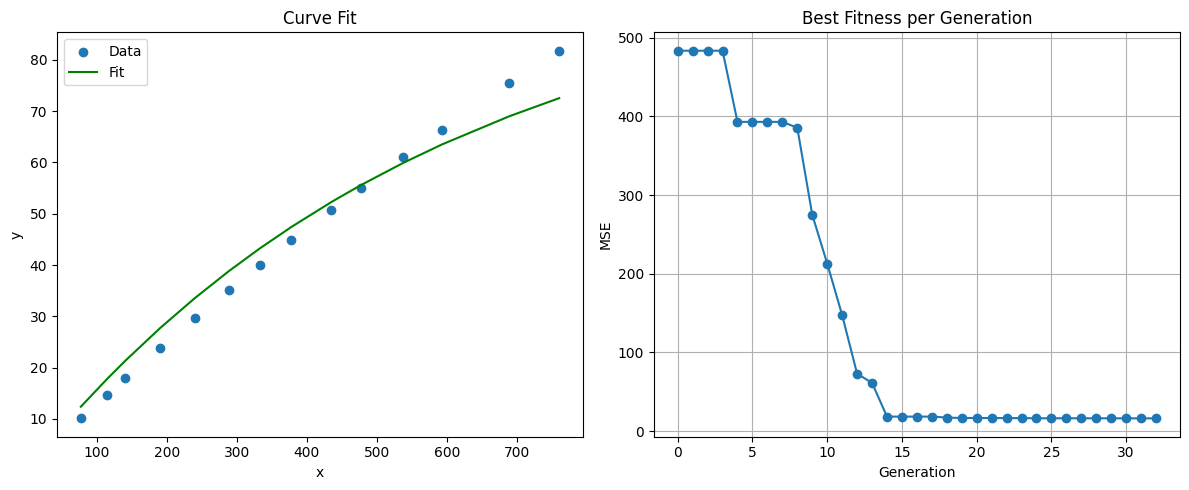

In [141]:
diff_evol(f1, data1, [[0, 100], [0, 1]])

Best b1: 94.2983927887459, Best b2: 0.003799240634017034


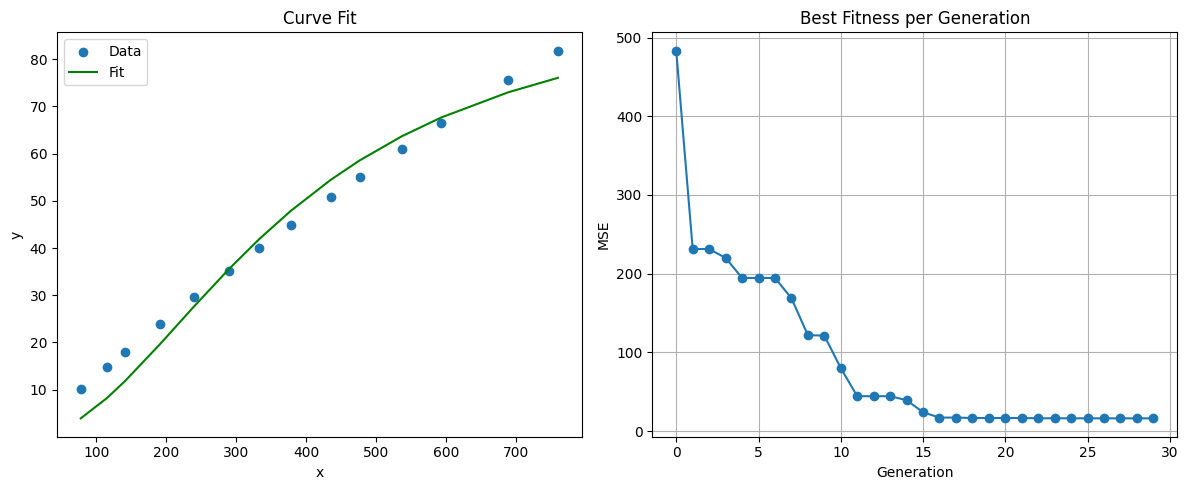

In [142]:
diff_evol(f5, data5, [[0, 100], [0, 1]])

Best b1: 640.4384962734663, Best b2: 0.0002066618682599571


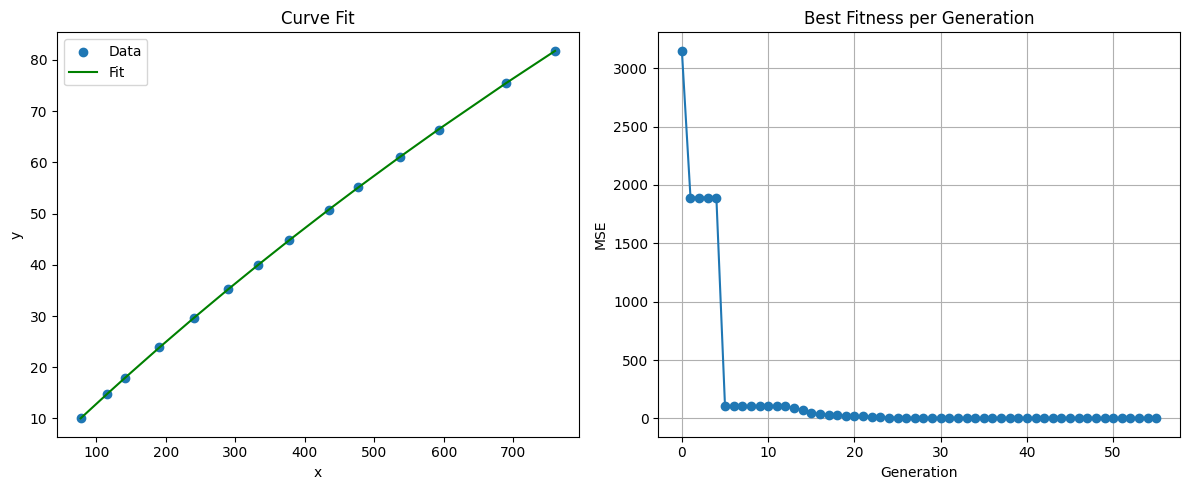

In [143]:
diff_evol(f10, data10, [[100, 1000], [0, 1]])